In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import symbols, Matrix, Eq, solve, N

In [2]:
# Определяем систему уравнений хищник-жертва
def predator_prey_system(z, t, alpha):
    x, y = z
    dxdt = x - (x / (1 + x)) * y - alpha * x**2
    dydt = -y + (x / (1 + x)) * y
    return [dxdt, dydt]

In [3]:
x0 = 1.0  # Начальная популяция жертвы
y0 = 0.5  # Начальная популяция хищника

In [4]:
# Параметр alpha
alpha = 0.1

# Временные точки, в которых вычисляется решение
t = np.linspace(0, 20, 500)

In [5]:
# Решение системы ОДУ
sol = odeint(predator_prey_system, [x0, y0], t, args=(alpha,))

# Извлечение популяции жертвы и хищника из решения
x = sol[:, 0]
y = sol[:, 1]

In [6]:
# Определяем переменные для нахождения точек покоя
x_sym, y_sym, alpha_sym = symbols('x y alpha')

# Определяем уравнения
f1 = x_sym - (x_sym / (1 + x_sym)) * y_sym - alpha_sym * x_sym**2
f2 = -y_sym + (x_sym / (1 + x_sym)) * y_sym

# Найдем точки покоя
equilibrium_points = solve((Eq(f1, 0), Eq(f2, 0)), (x_sym, y_sym))

# Формируем матрицу Якоби
J = Matrix([[f1.diff(x_sym), f1.diff(y_sym)],
             [f2.diff(x_sym), f2.diff(y_sym)]])

In [7]:
# Вычисляем точки покоя и их собственные значения
eigenvalues_list = []
for eq in equilibrium_points:
    J_eq = J.subs({x_sym: eq[0], y_sym: eq[1], alpha_sym: alpha})
    eigenvalues = J_eq.eigenvals()
    eigenvalues_list.append((eq, eigenvalues))
    
for eq, eigenvalues in eigenvalues_list:
    print(f'Точка покоя: {eq}, Собственные значения: {eigenvalues}')

Точка покоя: (0, 0), Собственные значения: {1: 1, -1: 1}
Точка покоя: (1/alpha, 0), Собственные значения: {-alpha/(alpha + 1): 1, 1.0*(1.0*alpha - 0.2)/alpha: 1}


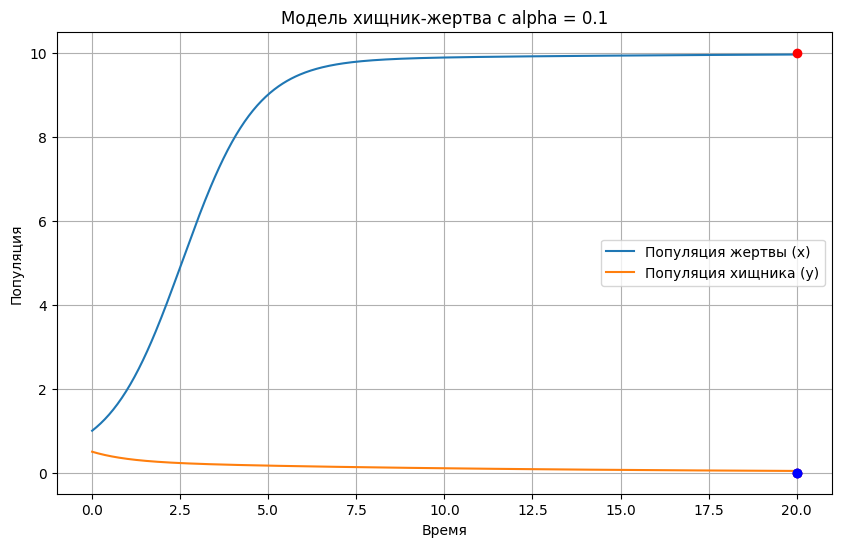

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Популяция жертвы (x)')
plt.plot(t, y, label='Популяция хищника (y)')
plt.xlabel('Время')
plt.ylabel('Популяция')
plt.title(f'Модель хищник-жертва с alpha = {alpha}')

# Отображение точек покоя на графике
for eq in equilibrium_points:
    # Преобразуем символические выражения в числовые значения
    eq_numeric = [N(val.subs(alpha_sym, alpha)) for val in eq]
    plt.plot(t[-1], eq_numeric[0], 'ro')  # Точка покоя для жертвы
    plt.plot(t[-1], eq_numeric[1], 'bo')  # Точка покоя для хищника

plt.legend()
plt.grid(True)
plt.show()